<a href="https://colab.research.google.com/github/SAH-UJA/Machine-Translation/blob/main/RPN_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/experiencor/kangaroo.git

In [ ]:
from xml.etree import ElementTree
def parseXML(filename):
  # load and parse the file
  tree = ElementTree.parse(filename)
  # get the root of the document
  root = tree.getroot()
  # extract each bounding box
  for box in root.findall('.//bndbox'):
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    coors = [xmin, ymin, xmax, ymax]
  # extract image dimensions
  width = int(root.find('.//size/width').text)
  height = int(root.find('.//size/height').text)
  return [coors,width,height]

In [ ]:
coors,w,h = parseXML("kangaroo/annots/00001.xml")

In [ ]:
print(coors,w,h)

[134, 105, 341, 253] 450 319


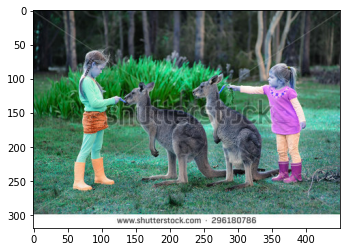

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread("kangaroo/images/00001.jpg")
plt.imshow(img)

In [ ]:
img = img[coors[0]:coors[2],coors[1]:coors[3]]

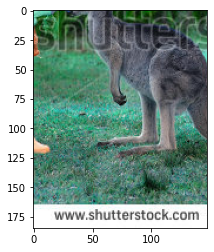

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(185, 148, 3)

In [ ]:
img = cv2.imread("kangaroo/images/00001.jpg")

In [ ]:
img.shape

(319, 450, 3)

In [ ]:
img = cv2.imread("kangaroo/images/00002.jpg",0)

In [ ]:
img.shape

(309, 550)

In [ ]:
import os
import cv2
X = []
y = []
for i in os.listdir('kangaroo/images'):
  coors,w,h = parseXML('kangaroo/annots/'+i[:-4]+'.xml')
  img = cv2.imread("kangaroo/images/"+i,0)
  img = cv2.resize(img,(100,100))
  sx=100/w
  sy=100/h
  coors[0] = int(coors[0]*sx)
  coors[2] = int(coors[2]*sx)
  coors[1] = int(coors[1]*sy)
  coors[3] = int(coors[3]*sy)
  y.append(coors)
  X.append(img)  

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(164, 100, 100)

In [ ]:
y.shape

(164, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,X_test.shape)

(131, 100, 100) (33, 100, 100)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(100,100,1)))
model.add(layers.Conv2D(32,(3,3), activation='tanh'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3), activation='tanh'))
model.add(layers.Dropout(0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 16)        4624      
_________________________________________________________________
dropout_5 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 47, 47, 16)       

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
X_train = np.expand_dims(X_train,axis=1).reshape(131,100,100,1)

In [ ]:
X_test = np.expand_dims(X_test,axis=1).reshape(33,100,100,1)

In [ ]:
X_test.shape

(33, 100, 100, 1)

In [ ]:
model.predict(X_test).shape

(33, 4)

In [ ]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
5/5 [==============================] - 2s 347ms/step - loss: 2659.8279 - mse: 2659.8279 - val_loss: 2196.5967 - val_mse: 2196.5967
Epoch 2/10
5/5 [==============================] - 2s 316ms/step - loss: 762.0037 - mse: 762.0037 - val_loss: 2021.1633 - val_mse: 2021.1633
Epoch 3/10
5/5 [==============================] - 2s 313ms/step - loss: 470.4613 - mse: 470.4613 - val_loss: 2000.8458 - val_mse: 2000.8458
Epoch 4/10
5/5 [==============================] - 2s 311ms/step - loss: 610.4163 - mse: 610.4163 - val_loss: 1986.1487 - val_mse: 1986.1487
Epoch 5/10
5/5 [==============================] - 2s 315ms/step - loss: 407.0449 - mse: 407.0449 - val_loss: 2028.0284 - val_mse: 2028.0284
Epoch 6/10
5/5 [==============================] - 2s 316ms/step - loss: 381.7671 - mse: 381.7671 - val_loss: 2044.2311 - val_mse: 2044.2311
Epoch 7/10
5/5 [==============================] - 2s 318ms/step - loss: 396.4849 - mse: 396.4849 - val_loss: 1972.5197 - val_mse: 1972.5197
Epoch 8/10
5/5 [==

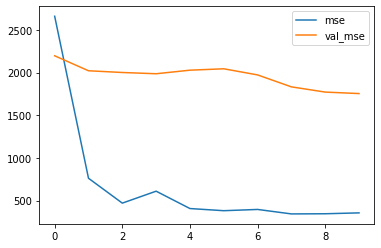

In [ ]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='val_mse')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
history = model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),callbacks=[ReduceLROnPlateau(),ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.8f}.h5',monitor='val_loss',save_only_best=True)])

Epoch 1/100
5/5 [==============================] - 3s 567ms/step - loss: 307.2141 - mse: 307.2141 - val_loss: 1297.1403 - val_mse: 1297.1403
Epoch 2/100
5/5 [==============================] - 2s 361ms/step - loss: 312.0048 - mse: 312.0048 - val_loss: 1213.7150 - val_mse: 1213.7150
Epoch 3/100
5/5 [==============================] - 2s 318ms/step - loss: 304.4494 - mse: 304.4494 - val_loss: 1224.5967 - val_mse: 1224.5967
Epoch 4/100
5/5 [==============================] - 2s 322ms/step - loss: 297.7191 - mse: 297.7191 - val_loss: 1228.1499 - val_mse: 1228.1499
Epoch 5/100
5/5 [==============================] - 2s 315ms/step - loss: 292.6796 - mse: 292.6796 - val_loss: 1134.9384 - val_mse: 1134.9384
Epoch 6/100
5/5 [==============================] - 2s 314ms/step - loss: 289.6858 - mse: 289.6858 - val_loss: 1100.2744 - val_mse: 1100.2744
Epoch 7/100
5/5 [==============================] - 2s 317ms/step - loss: 283.7512 - mse: 283.7512 - val_loss: 1053.3846 - val_mse: 1053.3846
Epoch 8/100
5

In [ ]:
X_train.shape

(131, 100, 100, 1)

In [ ]:
X_train[0]

array([[[249],
        [225],
        [217],
        ...,
        [241],
        [249],
        [252]],

       [[251],
        [217],
        [152],
        ...,
        [202],
        [232],
        [245]],

       [[247],
        [200],
        [ 56],
        ...,
        [170],
        [204],
        [226]],

       ...,

       [[246],
        [203],
        [213],
        ...,
        [211],
        [219],
        [242]],

       [[253],
        [236],
        [227],
        ...,
        [241],
        [229],
        [243]],

       [[252],
        [239],
        [244],
        ...,
        [227],
        [237],
        [221]]], dtype=uint8)

In [ ]:
model.predict(np.expand_dims(X_train[0],axis=0))

array([[ 15.361641,  26.687511,  71.36923 , 115.22226 ]], dtype=float32)

In [ ]:
y_train[0]

array([27, 15, 68, 93])

In [ ]:
img = cv2.imread("kangaroo/images/00001.jpg",0)

In [ ]:
coors,w,h = parseXML("kangaroo/annots/00001.xml")

In [ ]:
coors

[134, 105, 341, 253]

In [ ]:
img = cv2.resize(img,(100,100))

In [ ]:
coors[0] = int(coors[0]*(100/w))
coors[2] = int(coors[2]*(100/w))
coors[1] = int(coors[1]*(100/h))
coors[3] = int(coors[3]*(100/h))

In [ ]:
coors

[29, 32, 75, 79]

In [ ]:
img = np.expand_dims(img.reshape((100,100,1)),axis=0)

In [ ]:
pcoors = model.predict(img)

In [ ]:
k = X_train[0].reshape(100,100)

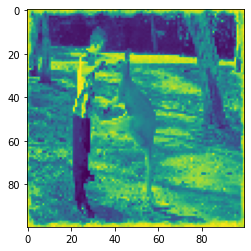

In [ ]:
plt.imshow(k)

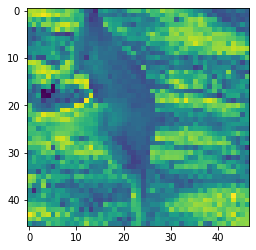

In [ ]:
plt.imshow(k[coors[0]:coors[2],coors[1]:coors[3]])

In [ ]:
pcoors

array([[33.21411 , 35.153095, 84.9214  , 96.72466 ]], dtype=float32)

In [ ]:
pcoors.shape

(1, 4)

In [ ]:
pcoors = pcoors.reshape((4,))

In [ ]:
img[int(pcoors[0]):int(pcoors[2]),int(pcoors[1]):int(pcoors[3])]

array([[ 70, 129, 105, ...,  74,  61,  61],
       [ 65, 135, 142, ..., 108, 100,  95],
       [ 20, 116, 110, ..., 117, 112, 107],
       ...,
       [103, 135, 111, ...,  94,  96, 106],
       [102, 119, 137, ..., 108,  84,  69],
       [139, 136, 147, ..., 105, 110, 126]], dtype=uint8)

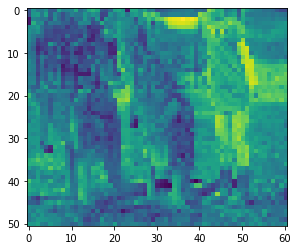

In [ ]:
plt.imshow(img[int(pcoors[0]):int(pcoors[2]),int(pcoors[1]):int(pcoors[3])])